# Analyzing and Predicting Customer Churn in Banking

<div>
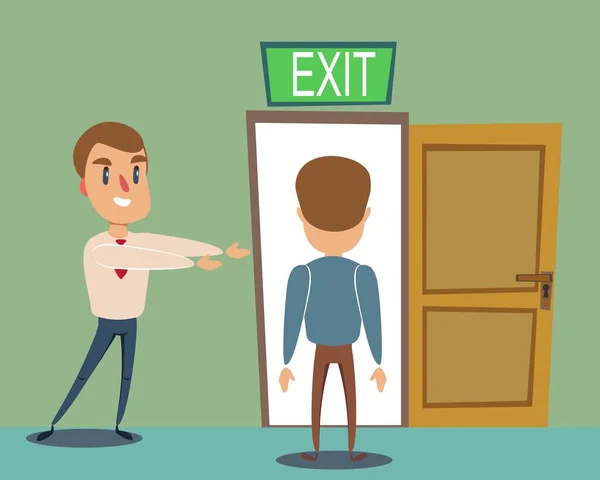
</div>

Understanding customers behavior is paramount, especially when it comes to churn, that is,  when customers decide to stop using a service.



For this project, I will be delving into customer churn within the banking sector, examining various influencing factors. Before diving into the analysis, I believe it's  essential to clarity the concept of churn for better undertanding. Churn, also known as 'Exit,' refers to customers leaving a service or place, either voluntarily or due to specific circumstances. On the flip side, 'retention' represents those customers who choose to stay.



In this analysis, my goal is to predict whether specific factors impact churn rates within the bank. This exploration will provide valuable insights into the reasons behind customer departures and the factors that warrant examination.

This dataset comprises a combination of variables, and it's worth noting its origin from Kaggle.



# The Dataset

- RowNumber: Corresponds to the record (row) number and has no effect on the output.
- CustomerId: Contains random values and has no impact on the customer's decision to leave the bank.
- Surname: The surname of a customer has no influence on their decision to leave the bank.
- CreditScore: Can affect customer churn, as customers with higher credit scores are less likely to leave.
- Geography: A customer's location can impact their decision to leave the bank.
- Gender: It's interesting to explore whether gender plays a role in customer departures.
- Age: Relevant, as older customers are less likely to leave the bank than younger ones.
- Tenure: Refers to the number of years the customer has been a client; older clients tend to be more loyal.
- Balance: A good indicator of customer churn; higher balances correlate with lower chances of leaving.
- NumOfProducts: Indicates the number of products a customer has purchased through the bank.
- HasCrCard: Denotes whether a customer has a credit card; this can affect churn rates.
- IsActiveMember: Active customers are less likely to leave the bank.
- EstimatedSalary: Similar to balance, customers with lower salaries are more likely to leave.
- Exited: Indicates whether the customer left the bank or not."


## Objectives of the Dataset

In this dataset, the primary focus revolves around the dependent variable, "Exited". This variable also serves as the target, and the objective is to predict and provide explanations for its outcomes using the various independent variables present in the dataset.

As I previously mentioned, the overarching objective is to attain deep insights into customer behavior and the underlying factors influencing their choices to remain with or depart from the bank.

In [39]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import boxcox
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    precision_score,
    accuracy_score,
    recall_score,
    f1_score,
    classification_report,
)
from sklearn.metrics import roc_curve, roc_auc_score


import warnings
#suppress future warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [87]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Explore the data

In [88]:
#the number of rows and columns 
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns in the dataset")

There are 10000 rows and 14 columns in the dataset


### Top 5 Values from the Dataset

In [89]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Bottom 5 Values in the Dataset

In [90]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Missing Values Summary

In [91]:
missing_values = df.isna().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Data Types

In [92]:
#accessing data types of df columns
column_data_types = df.dtypes
column_data_types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Duplicate Rows Count

In [93]:
#checking for duplicate rows in a df
duplicate_rows = df[df.duplicated()].count()
duplicate_rows

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Summary Statistics for All Columns

In [94]:
#getting the summary statistics of all columns in the df
summary_stats = df.describe(include='all')

#transpose the results 
summary_stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


# Data Cleaning

#### 1. Convert Column Names to Lowercase

In [95]:
#converting all columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

#### 2. Renaming DataFrame Columns

In [96]:
#renaming the df columns for clarity
df.rename(columns = {'rownumber' : 'row_number',
                      'customerid' : 'customer_id',
                      'creditscore' : 'credit_score',
                      'numofproducts': 'num_of_products',
                      'hascrcard': 'has_credit_card',
                      'isactivemember' : 'is_active_member',
                      'estimatedsalary': 'estimated_salary'}, inplace = True)

#### 3. Dropping Unnecessary Columns

In [97]:
#dropping the unnecessary columns
df = df.drop(columns = ["row_number", "customer_id", "surname"])

# Analyzing Customer Behavior Patterns through EDA

- In this section, I'll delve into the dataset to gain insights and clarity regarding the factors influencing customer churn. This involves focusing on examining the distribution of age, customer segmentation and many more.

- "The 'Exited' variable, which have a value of either 0 or 1, is like a traffic light in this analysis. It helps to figure out whether a customer decided to stay with the bank (0) or leave (1). So, it's a bit like a 'stay or go' signal.

### 1. The Distribution of Churn (Exited)

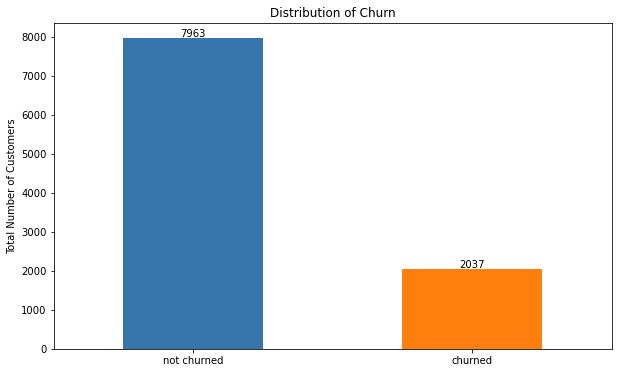

In [98]:
#count the occurrences of each class in the "exited" column
exited_counts = df['exited'].value_counts()

#creating labels for the x-axis
exited_labels = ['not churned', 'churned']

#plotting the distribution
plt.figure(figsize = (10, 6))
ax = exited_counts.plot(kind = 'bar', color = ['#3776ab', 'C1'])

#add the title
plt.title('Distribution of Churn')

#labeling the axes
plt.ylabel('Total Number of Customers')

#customize the x-axis tick labels
plt.xticks(range(len(exited_labels)), exited_labels, rotation=0)

#to get the values at the top of each bar
for p in ax.patches:
    #check for null values
    if not np.isnan(p.get_height()): 
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha ='center', va = 'bottom')

#show the plot
plt.show()

The chart above indicates that that most customers about 7,963 which is about 79.63%, are still using the bank's services without leaving (not churned). On the other hand, around 20.37% of customers 2,037 have decided to stop using the bank's services (churned).

### 2. Age Distribution Analysis: Understanding the Age Variation Between Churned and Non-Churned Customers

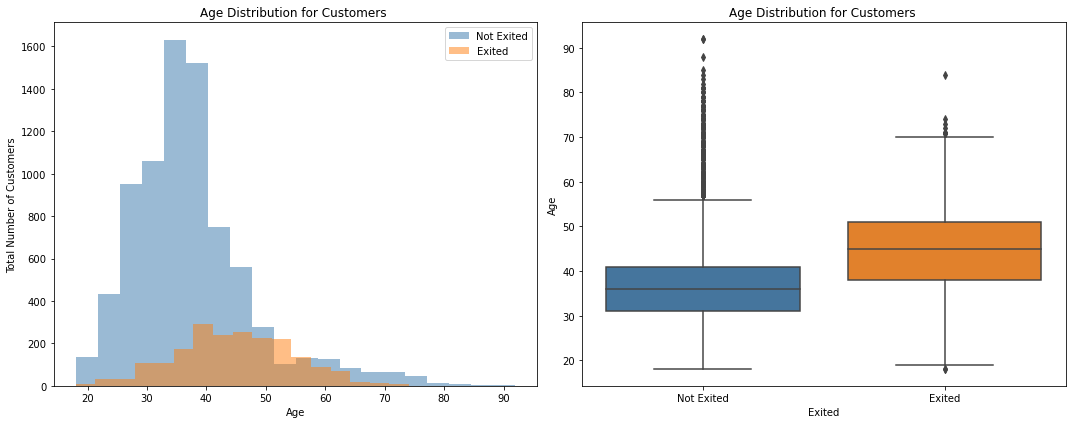

In [99]:
#creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#plot the histogram on the left subplot
#for the first plot
axes[0].hist(df[df['exited'] == 0]['age'], bins=20, alpha=0.5, label='Not Exited', color = '#3776ab')
axes[0].hist(df[df['exited'] == 1]['age'], bins=20, alpha=0.5, label='Exited', color = 'C1')
axes[0].set_title('Age Distribution for Customers ')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Number of Customers')
axes[0].legend()

#plot the box plots on the right subplot
#for the second plot
sns.boxplot(x = 'exited', y = 'age', data = df, palette = ['#3776ab', 'C1'], ax = axes[1])
axes[1].set_title('Age Distribution for Customers ')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Age')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Exited', 'Exited'])

plt.tight_layout()

#show the plot
plt.show()

The charts reveals that both groups ('exited' vs 'not exited') include customers as young as 18 years old. There is also a significant difference in the age of the oldest individuals. Customers who remained with the bank have an age range extending up to 92 years, while exiting customers have a maximum age of 84 years.

It also appears that customers who leave the bank tend to be closer in age to each other compared to those who stay. This could mean that age plays a role in why some customers leave.

### 3. Customer Segmentation: Understanding How Different Customer Groups Relate to Churn

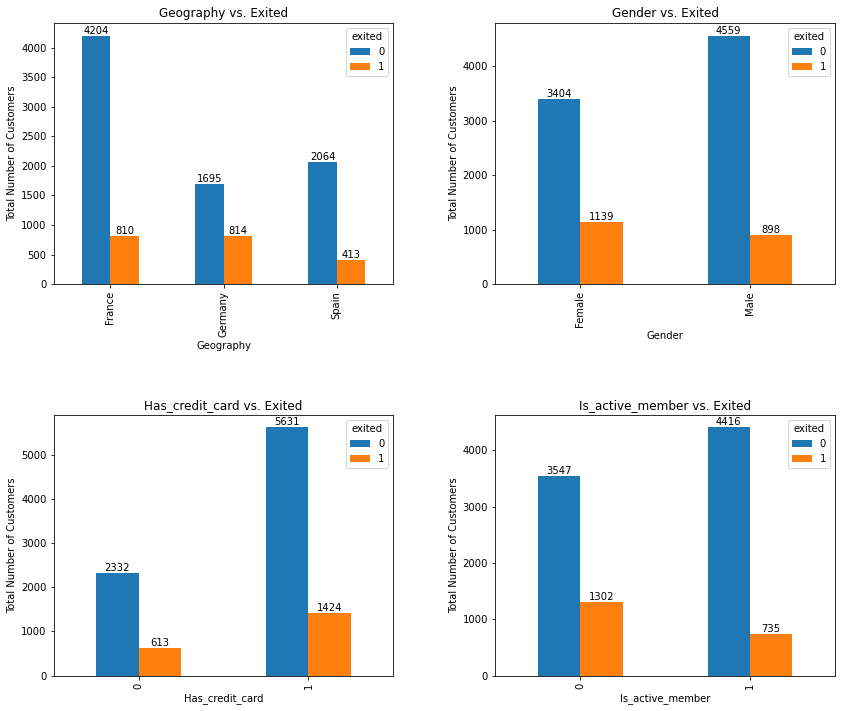

In [100]:
#list of categorical columns for the segmentation
categorical_columns = ["geography", "gender", "has_credit_card", "is_active_member"]

#creating subplots in a 2x2 grid with increased spacing
fig, axes = plt.subplots(2, 2, figsize = (14, 12))

#adjust spacing here
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)  

#creating individual bar charts for categorical columns
for i, col in enumerate(categorical_columns):

    #group the data by the categorical column and "exited" column and get the counts
    data_grouped = df.groupby([col, 'exited']).size().unstack()

    #creating a bar chart for the current categorical column
    ax = data_grouped.plot(kind = 'bar', ax = axes[i // 2, i % 2])

    #setting the title by capilizing it, x-axis label, and y-axis label
    ax.set_title(f"{col.capitalize()} vs. Exited")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Total Number of Customers")

#to get the values at the top of each bar
    for p in ax.patches:
        if not np.isnan(p.get_height()):  # Check for NaN values
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'bottom')

#show the plots
plt.show()

1.  Geographic Impact:
In France, 39% of customers left, while in Spain, only 20% left. Germany falls somewhere in between.
2.  Gender Matters:
Gender plays a role. Females (about 56%) decide to leave, whereas males (about 44%) make the same choice. Women are more inclined to disembark.
3.  Credit Cards:
Customers who own credit cards exhibit a slightly higher churn rate, with 56% opting to leave the bank while customers without credit cards have a lower churn rate, as only 44% decide to exit.
4.  Activity Level:
Activity matters too. Active member (like using  account actively) makes you more likely to stay while those that are not active has higher chances leaving.

### 4. Relationship Between Account Balance and Churn

In [101]:
#define the ages column into the bin edges to get a range
bin_edges = [-1, 50000, 100000, 150000, 200000, 250000, 300000]
b_edges = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000', '250000+']


#creating a new column that represents the balance bins
df['balance_range'] = pd.cut(df['balance'], bins = bin_edges, labels = b_edges)

#showing the first few rows of the  new column 
df['balance_range'].head(3).reset_index().drop('index', axis = 1)

,balance_range
0,0-50000
1,50001-100000
2,150001-200000


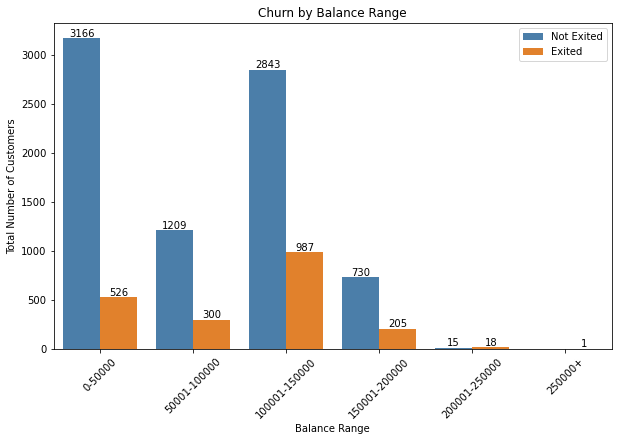

In [102]:
plt.figure(figsize = (10, 6))

#plotting the distribution
ax = sns.countplot(data = df, x ='balance_range', hue = 'exited', palette = {0: '#3b7fb9', 1: 'C1'})

#add the title
plt.title('Churn by Balance Range')

#labeling the axes
plt.xlabel('Balance Range')
plt.ylabel('Total Number of Customers')

plt.xticks(rotation = 45)  

#adding the figures on top of each bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'bottom')

plt.legend(labels = ['Not Exited', 'Exited'], loc = 'upper right')

#show the plot
plt.show()


There are many customers in lower account balances ranges, especially in the '0-50000', '50001-100000' and '100001-150000' ranges. Unfortunately, more customers also tend to leave when their balances are lower. On the bright side, customers with bigger balances, like those in the  '150001-200000' ranges, tend to stay with the bank

### 5. Relationship Between Estimated Salary and Balance

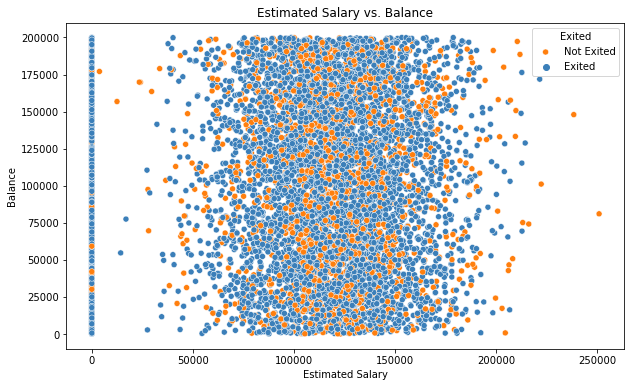

In [103]:
#to create a scatter plot
plt.figure(figsize = (10, 6))

#plotting the distribution
sns.scatterplot(data = df, y = 'estimated_salary', x = 'balance', hue = 'exited', palette = {0: '#3b7fb9', 1: 'C1'})

#adding a title
plt.title('Estimated Salary vs. Balance')

#addding a label
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')

#adding the legend
plt.legend(title = 'Exited', loc = 'upper right', labels = ['Not Exited', 'Exited'])

#show the plot
plt.show()

It is evident that estimated salary and balance share a similar pattern without a clear linear relationship. Notably, a significant portion of customers who exited (exited = 1) have an estimated salary of 0, suggesting possible account closure with a zero balance before departure. This behavior may indicate inactivity or fund withdrawal.

Also, Customers who stayed have a wide range of incomes, while those who left have incomes clustered around the middle.

### 6. How Do Credit Cards and Active Memberships Impact Customer Behaviour?

In [104]:
#grouping by credit card and activeness of the members
grouped_data = df.groupby(['has_credit_card', 'is_active_member'])

#to calculate churn rate for each group
churn_rate = grouped_data['exited'].mean() * 100

#to calculate retention rate for each group, since churn rate + retention rate = 100
retention_rate = 100 - churn_rate

#showing the results
print("churn rate by credit card and active members:", '\n')
print(churn_rate)

print("\n\nretention rate by credit card and active members:", '\n')
print(retention_rate)


churn rate by credit card and active members: 

has_credit_card  is_active_member
0                0                   25.695931
                 1                   16.386010
1                0                   27.320186
                 1                   13.362905
Name: exited, dtype: float64


retention rate by credit card and active members: 

has_credit_card  is_active_member
0                0                   74.304069
                 1                   83.613990
1                0                   72.679814
                 1                   86.637095
Name: exited, dtype: float64


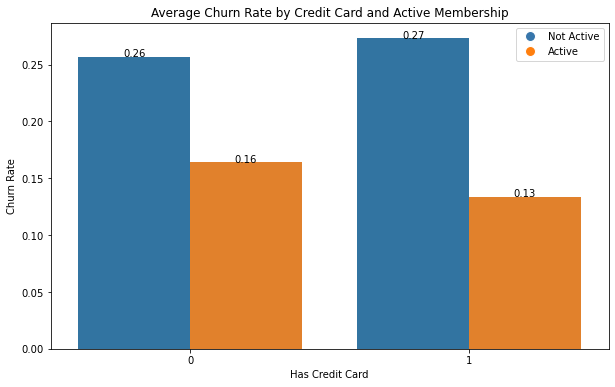

In [105]:
#grouping by credit card and active members
grouped_data = df.groupby(['has_credit_card', 'is_active_member'])['exited'].mean().reset_index()

#creating a bar chart
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = grouped_data, x = 'has_credit_card', y = 'exited', hue = 'is_active_member')

#add labels and a legend with custom colors
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate by Credit Card and Active Membership')

#define custom colors for legend labels
legend_colors = ['#3776ab', 'C1']

#create custom legend handles with specified colors
legend_labels = ['Not Active', 'Active']
legend_handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', label = label, markerfacecolor = color, markersize = 10) for label, color in zip(legend_labels, legend_colors)]
#add the legend with custom handles
plt.legend(handles = legend_handles, loc = 'upper right')

#annotate with mean values dervied on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center')

#show the plot
plt.show()


It is realised that customers who have credit cards and are active members tend to be loyal, with only around 13.36% leaving. However, if customers have credit cards but are not active members, they are more likely to leave, with a higher churn rate of about 27.32%. Similarly, customers without credit cards and inactive membership tend to leave more often, with a churn rate of about 25.70%.

In summary, having a credit card and being an active member encourages customer retention, while having a credit card but not being active increases the likelihood of leaving.

### 7. What is the Impact of Credit Cards and Active Membership on Churn Rates?

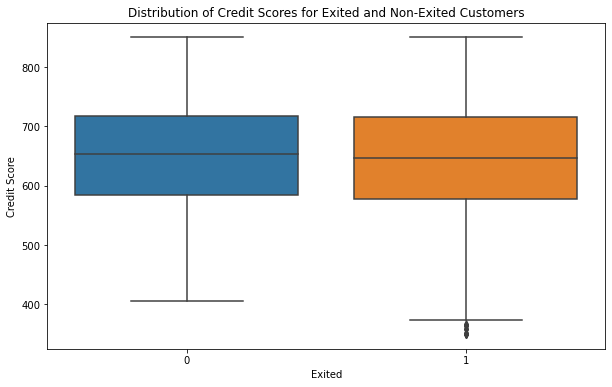

In [106]:
#set the size
plt.figure(figsize = (10, 6))

#create a boxplot
sns.boxplot(x = 'exited', y = 'credit_score', data = df)

#add a label
plt.xlabel('Exited')
plt.ylabel('Credit Score')

#add a title
plt.title('Distribution of Credit Scores for Exited and Non-Exited Customers')

#show the plot
plt.show()

Looking at the credit scores of customers who left and those who stayed, there's no any big differences. Both groups had about the same average credit score, and their credit scores ranged from low to high in a similar way. This basically indicates that credit scores don't seem to be the main reason why customers decide to leave or stay with the company.

# Overall Insights 

- Customer Distribution: The majority of customers (about 79.63%) are still loyal to the bank, but approximately 20.37% have left.

- Age Factor: Customers of all age groups exist in both categories. Those who stayed represent a wider age range, while those who left are clustered in similar age groups.

- Geographic Impact: France records the highest churn rate at 39%, followed by Germany (in between) and Spain with the lowest rate at 20%, according to `Worldometer 2023`. This variation is likely due to France's large population of 64.8 million and well-established banking sector. In contrast, Spain, with 47.5 million people, and Germany, with 83.3 million, have different banking landscapes, influencing customer numbers and churn rates.

- Gender Influence: More females (56%) exit compared to males (44%), implying gender plays a role in customer decisions.

- Credit Card Effect: Customers with credit cards exhibit a slightly higher churn rate (56%) compared to those without credit cards (44%).
- Activity Level: Active members are inclined to stay, while non-active members are prone to leave.
- Balance Range: Many customers have lower balances, and churn rates are higher in these ranges. 
- Estimated Salary: There is no clear linear relationship between estimated salary and churn, but customers with an estimated salary of 0 tend to leave. 
- Credit Score: There are no significant differences in credit scores between customers who exited and those who stayed.


# Preparing Data for Predictive Models

- In this section, I will analyze the data for outliers, missing values, assess data skewness and explore correlations.

### 1. Evaluating the Correlation of Numerical Columns with the Target Variable

In [107]:
#selecting only the numerical columns
numerical_columns = df.select_dtypes(include = 'number')

#showing the relationship between exited column and other columns
num_correlations = numerical_columns.corrwith(df['exited'])

#display the correlations
print(num_correlations.sort_values(ascending = False))

exited              1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
has_credit_card    -0.007138
tenure             -0.014001
credit_score       -0.027094
num_of_products    -0.047820
is_active_member   -0.156128
dtype: float64


- The correlation between the target variable 'exited' and several features, including age, balance, and estimated salary, is unexpectedly low, despite the fact that these features exhibit a positive correlation. This suggests that other factors may have a more significant impact on customer churn. 

### 2. Assessing Data Skewness

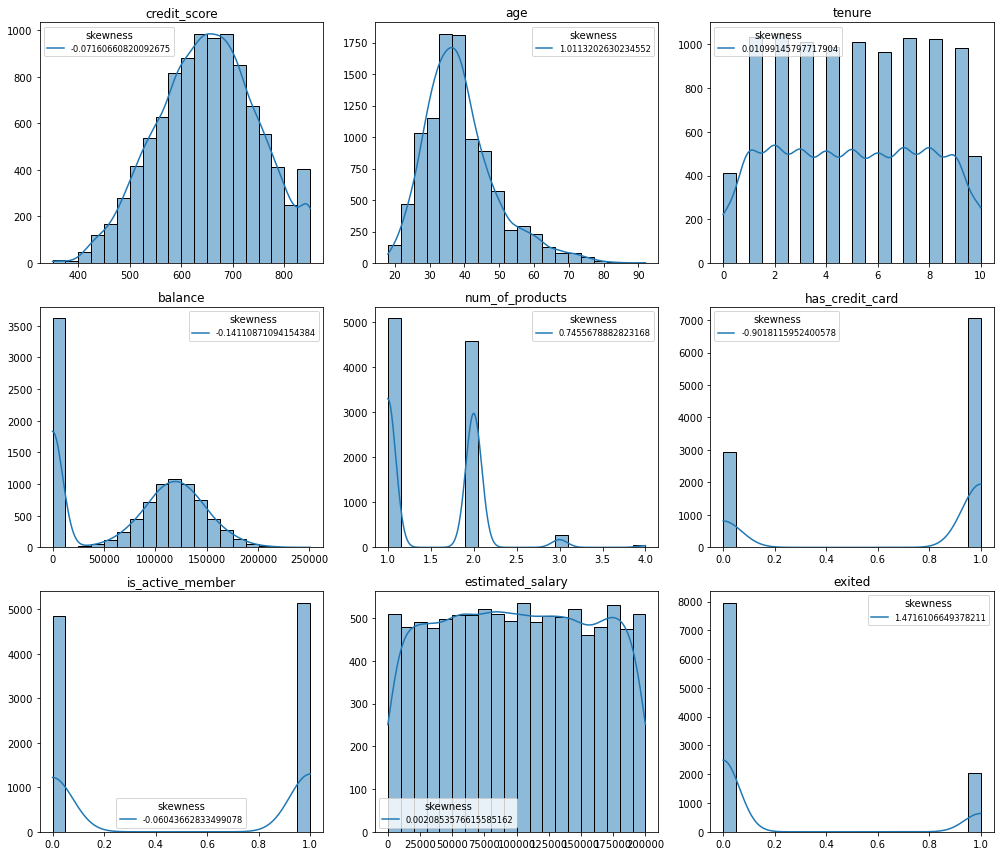

In [108]:
plt.figure(figsize = (14, 12))

#looping through  the numerical columns
for column in numerical_columns.columns:
    plt.subplot(3, 3, numerical_columns.columns.get_loc(column) + 1)
    
    #histogram plot
    sns.histplot(numerical_columns[column], bins = 20, edgecolor = 'black', kde = True)
    
    #add title
    plt.title(column)
    
    #remove the axis label
    plt.xlabel('')   
    plt.ylabel('')
    
    #calculating skewness 
    skewness = str(df[column].skew())
    
    #adding legend
    plt.legend([skewness], title = "skewness", fontsize = 'small')


plt.tight_layout()
plt.show()

In [109]:
#checking their skewness
numerical_columns.skew().sort_values(ascending = False)

exited              1.471611
age                 1.011320
num_of_products     0.745568
tenure              0.010991
estimated_salary    0.002085
is_active_member   -0.060437
credit_score       -0.071607
balance            -0.141109
has_credit_card    -0.901812
dtype: float64

In [110]:
#the skewed columns
skewed_cols = ['credit_score', 'age']

- Age is positively skewed, which means they it has more data points with higher values. This suggests that there's a concentration of customers with lower ages.

- Num_of_products is positively skewed, indicating that there are more customers with a lesser number of products.

- Has_credit_card is negatively skewed, suggesting that there's a concentration of customers with higher values, meaning more customers have credit cards.

- Balance is negatively skewed as well, indicating that few customers have lower account balances except for those with 0 balance.

- Is_active_member is negatively skewed, which means there are few customers categorized as non-active members.

- Credit_score is also relatively close to 0. This suggests a mild negative skew indicating that close to average customers have lower low credit scores.

- Estimated_salary have skewness values close to 0,meaning its distributions is close to symmetrical without any extremes on either side.

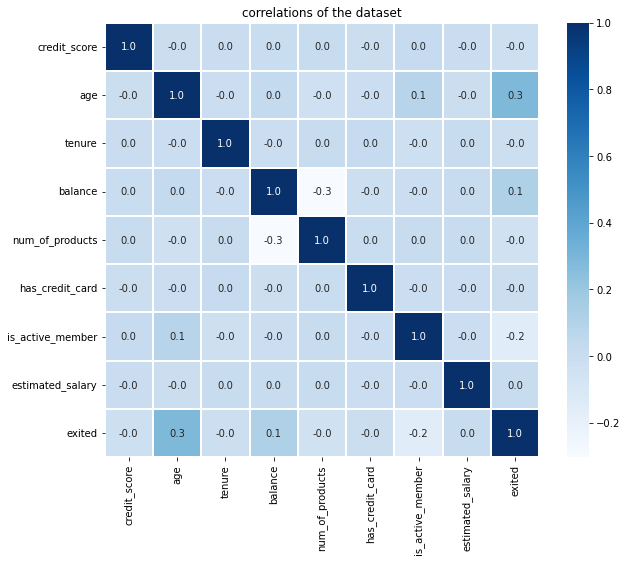

In [111]:
#visualising the numerical correleration with the target variable
plt.figure(figsize = (10,8))

sns.heatmap(df.corr(), annot = True, cmap = "Blues",  square = True, linecolor = 'white',linewidths = 2, fmt= '.1f')

#add title
plt.title('correlations of the dataset', fontsize= 12)
#show the plot
plt.show()

### 3. Detecting Outliers in the Data

In [112]:
#for the list before the loop
outlier_columns = [] 
for column in df.select_dtypes('number'):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    lower_outliers = (df[column] < lower_bound).sum()
    upper_outliers = (df[column] > upper_bound).sum()

    if lower_outliers > 0 or upper_outliers > 0:
        outlier_columns.append(column)

#columns with outliers       
outlier_columns  

['credit_score', 'age', 'num_of_products', 'exited']

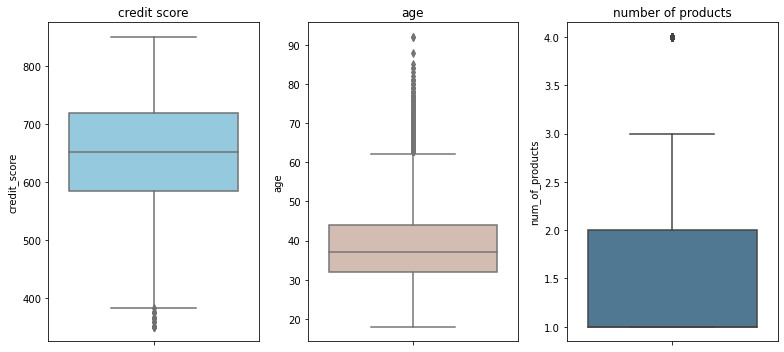

In [113]:
#creating a subplot grid
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (11, 5))

#creating a box plot for each of the column
sns.boxplot(ax = axes[0], data = df, y = 'credit_score', color = 'skyblue')
axes[0].set_title('credit score')

#age
sns.boxplot(ax = axes[1], data = df, y = 'age', color = '#d8bbac')
axes[1].set_title('age')

#number of products
sns.boxplot(ax = axes[2], data = df, y = 'num_of_products', color = '#457b9d')
axes[2].set_title('number of products')

#to adjust the spacing between subplots
plt.tight_layout()

#show the box plots
plt.show()

### 4. Assessing the Relationship Between the Target Variable and Categorical Variables

In [114]:
#drop balance range column, its a categoriacal column but its not needed anymore
df = df.drop('balance_range', axis = 1)

#selecting only the object columns
categorical_colms = df.select_dtypes('object')

#data transformation of the categorical to numerical 
categorical_colms = pd.get_dummies(categorical_colms)
categorical_colms.head(3)

,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0


In [115]:
#showing the relationship between target variable(exited) and the categorical columns
categorical_colms['exited'] = df['exited']
categorical_colms.corr()['exited'].sort_values(ascending = False)

exited               1.000000
geography_Germany    0.173488
gender_Female        0.106512
geography_Spain     -0.052667
geography_France    -0.104955
gender_Male         -0.106512
Name: exited, dtype: float64

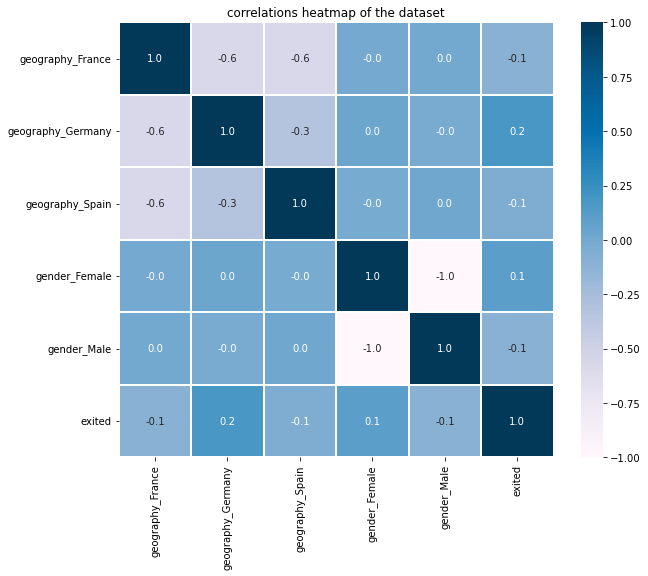

In [116]:
#plotting the dataset
plt.figure(figsize=(10,8))
sns.heatmap(categorical_colms.corr(), annot=True,  square=True, linecolor='white',linewidths = 2, fmt= '.1f', cmap = 'PuBu')
#add title
plt.title('correlations heatmap of the dataset', fontsize= 12)
#show the plot
plt.show()

Based on the patterns and statistical relationship in the dataset;

##### Positive Correlations:

- Customers from Germany are more likely to leave the service, indicating higher churn rates.

##### Negative Correlations:
- Customers from Spain and France are less likely to leave, suggesting lower churn rates.
- Both genders display small differences in their likelihood of churning, with females having a slightly higher probability of leaving and males showing a slightly lower likelihood of exit..

In essence, this analysis shows that customers from Germany and females are more prone to leaving the service, while customers from Spain, France, and males are less inclined to do so.

# Data Preprocessing 
- In this section, I will refine the data by addressing skewness previously identified and also encoding the categorical variables. This step is crucial to ensure that the data is well-prepared for constructing predictive models.


### 1. Transforming Skewed Data to Achieve a Normal Distribution Using Scipy's Box-Cox Method

In [117]:
#applying the scipy stats box-cox transformation to the skewed columns
for column in skewed_cols:
    df[column], _ = boxcox(df[column] + 1)  

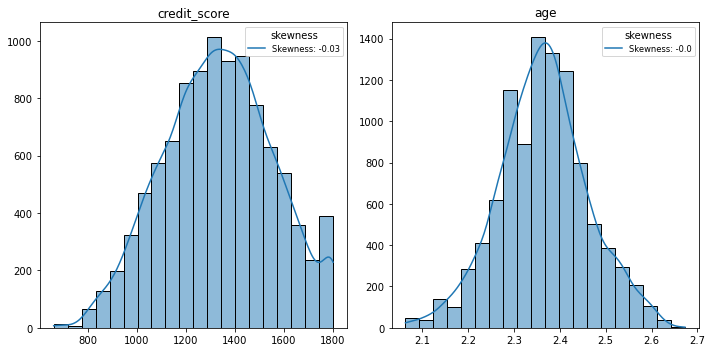

In [119]:
#plotting the chart to see the changes effected on the skewness
plt.figure(figsize=(10, 5))

#looping through  the numerical columns
for column in skewed_cols:
    plt.subplot(1, 2, skewed_cols.index(column) + 1)

    #histogram plot
    sns.histplot(df[column], bins = 20, edgecolor ='black', kde = True)
 
    #add title
    plt.title(column)

    #remove the axis label
    plt.xlabel('')
    plt.ylabel('')

    #calculating skewness
    skewness = round(df[column].skew(), 2)

     #adding legend
    plt.legend([f'Skewness: {skewness}'], title = "skewness", fontsize = 'small')

#adjusting the layout to prevent overlapping
plt.tight_layout()
plt.show()

- This is a significant achievement as the data's skewness has been effectively transformed!

- Upon examining the chart, it's evident that the skewness of 'credit_score' has reduced from `-0.0716` to a mere `0.03`, while 'age' has been transformed from `1.0113` to a perfect `0.0`. This transformation has yielded a normal distribution, which is highly favorable for our modeling process

### 2. Handling Categorical Data: Transforming Categorical Columns for Analysis 

In [120]:
#instantiate transformer
ohe = OneHotEncoder(use_cat_names=True)

#fit the transformer to data
ohe.fit(df)

#transform the data
df_ohe = ohe.transform(df)

df_ohe.head()

,credit_score,geography_France,geography_Spain,geography_Germany,gender_Female,gender_Male,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,1258.915086,1,0,0,1,0,2.407725,2,0.00,1,1,1,101348.88,1
1,1233.705954,0,1,0,1,0,2.398777,1,83807.86,1,0,1,112542.58,0
2,993.940871,1,0,0,1,0,2.407725,8,159660.80,3,1,0,113931.57,1
3,1443.941075,1,0,0,1,0,2.380050,1,0.00,2,0,0,93826.63,0
4,1800.489366,0,1,0,1,0,2.416415,2,125510.82,1,1,1,79084.10,0


# Data Modeling

### Classification Analysis
In this dataset, I am embarking on a classification analysis using three distinct models: Logistic Regression, K-Nearest Neighbors, and XGBoost. These models have a track record of excelling in classification tasks.

The primary objective is to categorize customers into different groups based on a variety of features, such as credit_score, geography, gender, age, tenure, balance, num_of_products, has_credit_card, is_active_member, and estimated_salary. The ultimate goal is to predict whether these customers will choose to "exit" the bank or stay. To gauge the performance of each model, I will employ crucial metrics, including Accuracy, Precision, Recall, and F1_score. This analysis aims to provide insights into customer decisions and their propensity to either remain with the bank or leave.


In [121]:
#splitting the data into feature matrix `X` and target vector `y`

#features variables
X = df_ohe.drop("exited", axis = 1)

#target variable
y = df_ohe["exited"]

In [122]:
# split the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

### 1. Logistic Regression

In [123]:
#create a logistic regression model
logistic_model = LogisticRegression()

#fit the model to the training dataset
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [125]:
#predict on the test dataset
LR_predictions = logistic_model.predict(X_test)
LR_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [126]:
#evaluate the accuracy of the model
accuracy = accuracy_score(y_test, LR_predictions)

#print the accuracy score
print("Accuracy Score:", round(accuracy * 100, 2), "%")

Accuracy Score: 80.53 %


### 2. K-Nearest Neighbors

In [127]:
#create a K-Nearest Neighbors (KNN) classifier
model_classifier = KNeighborsClassifier(
    n_neighbors = 2,
    metric = 'euclidean',  
    weights = 'uniform',
    leaf_size = 50,  
    p = 2)

#fit the model to the training dataset
model_classifier.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=50, metric='euclidean', n_neighbors=2)

In [128]:
#predict on the test dataset
KNN_predictions = model_classifier.predict(X_test)
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
#evaluate the accuracy of the model
accuracy = accuracy_score(y_test, KNN_predictions)

#print the accuracy score
print("Accuracy Score:", round(accuracy * 100, 2), "%")

Accuracy Score: 78.37 %


### 3. XGBoost

In [130]:
# Create an XGBoost classifier
model = XGBClassifier()

#fit the model to the training dataset
model.fit(X_train, y_train)

XGBClassifier()

In [131]:
#predict on the test dataset
XGB_predictions = model.predict(X_test)
XGB_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
#evaluate the accuracy of the model
accuracy = accuracy_score(y_test, XGB_predictions)

#print the accuracy score
print("Accuracy Score:", round(accuracy * 100, 2), "%")

Accuracy Score: 87.0 %


# Evaluating the Models' Performance 

### 1.  Confusion Matrix

In this analysis, I will utilize the confusion matrix as a crucial evaluation tool. The confusion matrix plays a pivotal role in assessing the effectiveness of machine learning models, particularly in classification tasks. Unlike basic accuracy metrics, the confusion matrix delves deeper into the models' performance by unveiling both accurate and erroneous classifications. It also offers invaluable insights into the models' ability to differentiate between various classes, pinpointing areas that may necessitate enhancement.

- #### Confusion Matrix Analysis for Logistic Regression Model

In [133]:
#performing a confusion matrix on knn model
LR_cm = confusion_matrix(y_test, LR_predictions)

print("Confusion Matrix:")
print(LR_cm)

Confusion Matrix:
[[2416    0]
 [ 584    0]]


- #### Confusion Matrix Analysis for K-Nearest Neighbors Model

In [134]:
#performing a confusion matrix on knn model
KNN_cm = confusion_matrix(y_test, KNN_predictions)

print("Confusion Matrix:")
print(KNN_cm)

Confusion Matrix:
[[2317   99]
 [ 550   34]]


- #### Confusion Matrix Analysis for XGBoost Model

In [135]:
#performing a confusion matrix on knn model
XGB_cm = confusion_matrix(y_test, XGB_predictions)

print("Confusion Matrix:")
print(XGB_cm)

Confusion Matrix:
[[2334   82]
 [ 308  276]]


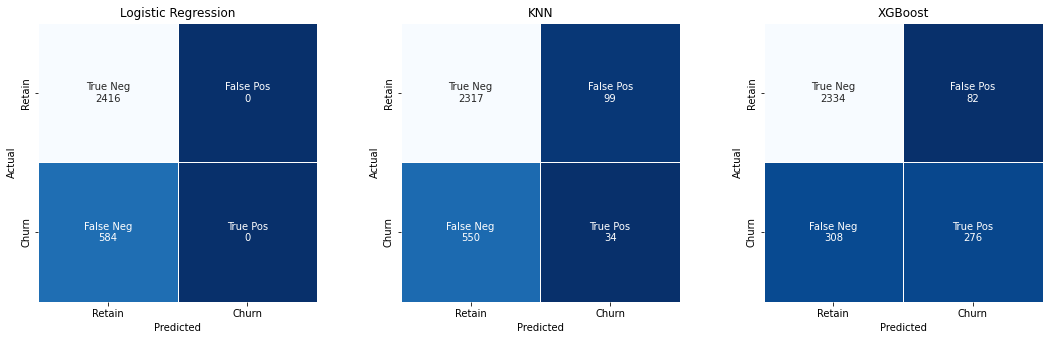

In [137]:
#create a function to plot a confusion matrix for the 3 models
def plot_confusion_matrix(cm, title, ax):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_figures = cm.flatten()
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_figures)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cm, annot = labels, fmt = "", cmap = 'Blues_r', linewidths = .5, cbar = False, square = True, ax = ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

#modify the labels here
cm_labels = np.array([['Retain', 'Churn'], ['Retain', 'Churn']])

fig, axes = plt.subplots(1, 3, figsize = (18, 6))

#confusion matrix for Logistic Regression
plot_confusion_matrix(LR_cm, 'Logistic Regression', axes[0])
axes[0].set_xticklabels(cm_labels[0])
axes[0].set_yticklabels(cm_labels[0])

#confusion matrix for KNN
plot_confusion_matrix(KNN_cm, 'KNN', axes[1])
axes[1].set_xticklabels(cm_labels[0])
axes[1].set_yticklabels(cm_labels[0])

#confusion matrix for XGBoost
plot_confusion_matrix(XGB_cm, 'XGBoost', axes[2])
axes[2].set_xticklabels(cm_labels[0])
axes[2].set_yticklabels(cm_labels[0])

#adjust spacing here
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

The confusion matrix results:

True Negatives (TN): where the actual outcome is negative (no churn), and the model correctly predicts a negative outcome.

True Positives (TP): where the actual outcome is positive (churn), and the model correctly predicts a positive outcome.

False Negatives (FN): where the actual outcome is positive (churn), but the model incorrectly predicts a negative outcome.

False Positives (FP): where the actual outcome is negative (no churn), but the model incorrectly predicts a positive outcome.



**Observations**

From the confusion matrices, it is observed that;

Logistic Regression has a higher number of True Negatives (2,416), indicating that it is good at predicting non-churners.

K-Nearest Neighbors (KNN) has some False Positives (99)

XGBoost has a higher number of True Positives (276), indicating its effectiveness in predicting churners 

As we can see, XGBoost demonstrates the highest accuracy, achieving an impressive Accuracy Score of 87%. In contrast, Logistic Regression and K-Nearest Neighbors (KNN) lag behind with Accuracy Scores of 80.35% and 78.35%, respectively. Examining the true negative column suggests that the model performs well in predicting non-churners but may require further tuning for improved performance.

### 2. Classification Report

In [139]:
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'XGBoost']

#empty lists to store the results
accuracies = []
precisions = []
recalls = []
f1_scores = []


#all predictions model
predictions = [LR_predictions, KNN_predictions, XGB_predictions]

#to calculate and store the metrics for each model
for prediction in predictions:
    accuracies.append(round(accuracy_score(y_test, prediction), 2))
    precisions.append(round(precision_score(y_test, prediction, zero_division = 0), 2)) #adding zero_division=0 to prevent warning
    recalls.append(round(recall_score(y_test, prediction), 2))
    f1_scores.append(round(f1_score(y_test, prediction), 2))

#a df to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})


print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      0.81       0.00    0.00      0.00
1  K-Nearest Neighbors      0.78       0.26    0.06      0.09
2              XGBoost      0.87       0.77    0.47      0.59


The confusion reports results;

Accuracy: Shows how often the model's predictions are correct overall.

Precision: Measures how well the model accurately predicts positive outcomes. In churn prediction, it tells us how often it correctly identifies actual churners.

Recall: Checks the model's ability to catch all relevant cases, like actual churners. Higher recall means it's good at capturing most of them.

F1 Score: Balances precision and recall, indicating an effective balance between being accurate and not missing important cases.

**Observations**

Logistic Regression exhibits the lowest performance across all metrics, including accuracy, precision, recall, and F1 Score. The low recall suggests that it's not effectively capturing actual churners.

K-Nearest Neighbors (KNN) performs slightly better than logistic regression but is still not optimal. It shows low precision and recall, indicating that many actual churners are being missed.

XGBoost stands out as the best model among the three. It has the highest accuracy, precision, recall, and F1 Score. It demonstrates the best balance between identifying actual churners and non-churners.

As earlier stated, XGBoost stands out as the superior model for churn prediction in this dataset. Its high accuracy, coupled with strong precision, recall, and F1 Score, makes it the preferred choice for identifying both churn and non-churn customers. Nevertheless, I will fine-tune it to enhance its performance further.


### 3. ROC Curve

An ROC curve is a visual tool for assessing a classification model's performance. It shows how effectively the model distinguishes between different classes (in this context, churn and non-churn) across various threshold values. A well-performing model exhibits an ROC curve that inclines toward the top-left corner, signifying high True Positive Rate (TPR) and low False Positive Rate (FPR).

In this case, I won't be plotting the ROC curve for Logistic Regression due to its lower calculated AUC (Area Under the Curve) value.

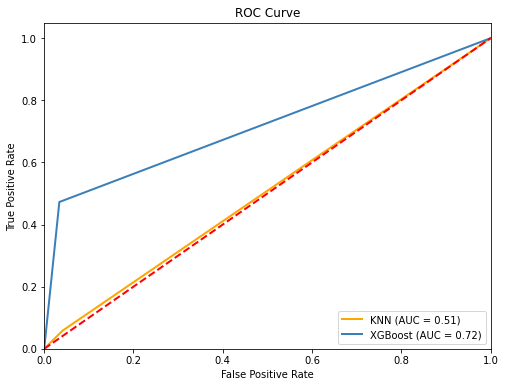

In [141]:
#calculate the ROC curve for KNN
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, KNN_predictions)
roc_auc_KNN = roc_auc_score(y_test, KNN_predictions)


#calculate the ROC curve for XGB
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, XGB_predictions)
roc_auc_XGB = roc_auc_score(y_test, XGB_predictions)

#all models on the same chart
plt.figure(figsize=(8, 6))

#plot the chart for the 2 models
plt.plot(fpr_KNN, tpr_KNN, color = 'orange', lw  =2, label = f'KNN (AUC = {roc_auc_KNN:.2f})')
plt.plot(fpr_XGB, tpr_XGB, color = '#3b7fb9', lw = 2, label = f'XGBoost (AUC = {roc_auc_XGB:.2f})')

#plot the line 
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#add label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add title
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


- As observed in the chart above, XGB shows the best performance as it leans towards the top-left corner with an AUC of 0.72, outperforming KNN.

### 4. Dealing with Class Imbalance


In [143]:
df_ohe["exited"].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

- The dataset exhibits a significant class imbalance, a common scenario in classification tasks like Churn Prediction, Fraud Detection, Claim Prediction etc. 

- The prevalence of 0 (not churn) values may result in lower precision and recall scores, especially noticeable in the top-performing model, XGBoost, among the three models examined. 

- The primary objective now  is to rectify this imbalance by giving attention to the minority class, 1 (churn), prior to hyperparameter tuning. 
- To achieve this, I opt for SMOTE (Synthetic Minority Over-sampling Technique) instead of RandomOverSampler to mitigate the risk of overfitting.

In [144]:
#classifiation report on the xgboost model
print(classification_report(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.47      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [145]:
from imblearn.over_sampling import SMOTE

#create an instance of SMOTE
smote = SMOTE(random_state=42)

#Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [146]:
y_resampled.value_counts()

1    7963
0    7963
Name: exited, dtype: int64

- Now we have increased the `churn` class to the size of the `not churn` class

# Hyperparameter Tuning

- I will be fine-tuning the XGBoost model using RandomizedSearchCV to enhance its performance and predictive accuracy.
 

In [147]:
import time

#setting the parameters grid for XGBoost
param_dist = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],


}
random_search = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions = param_dist,
    n_iter = 100,
    cv = 5,
    verbose = 1,
    n_jobs = 4,  # Limit the number of CPU cores
    random_state = 42
)


#measure the start time
start_time = time.time()

#fitting the model for random search cv
random_search.fit(X_resampled, y_resampled)

#measure the end time
end_time = time.time()

#calculate and print the execution time for RandomizedSearchCV
execution_time = end_time - start_time
print("RS-CV execution time:", execution_time, "seconds")


#to get the best parameters and estimator from the random search
best_params = random_search.best_params_
best_model = random_search.best_estimator_

    


Fitting 5 folds for each of 100 candidates, totalling 500 fits
RS-CV execution time: 337.4771771430969 seconds


In [148]:
#the best parameters and model score
print("best Parameters:", best_params)
print("model score on the testing data:", best_model.score(X_test, y_test))

best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
model score on the testing data: 0.9213333333333333


In [149]:
#make predictions on the training dataset
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2416
           1       0.88      0.69      0.77       584

    accuracy                           0.92      3000
   macro avg       0.90      0.83      0.86      3000
weighted avg       0.92      0.92      0.92      3000



- As observed, the performance accuracy of the XGBoost model has shown remarkable improvement, surging from 87% to 92%

# Recommendation and Conclusion


#### Recommendations
Based on the insights gathered from the analysis above;
- In order keep these customers from leaving, they should be encouraged to use their credit cards, especially if they have one but don't use it much. Also giving them rewards or perks for using their cards, like cashback or discounts goes a long way to make them want to keep using it.

- Customer engagement strategies should be implemented particularly for non-active members. These strategies should include actively encouraging them to use their accounts, ultimately reducing churn and fostering stronger customer loyalty.

- Initiatives should be created to retain customers with lower balances by offering additional services or incentives. This approach can effectively retain a significant portion of the customer base and enhance overall profitability.

- Lastly, Recognizing the impact of gender on churn rates is advantageous. It allowsto create marketing and services that specifically cater to men and women to reduce the number of people leaving the company, especially among females, and keep more customers happy and loyal.



The hyperparameter tuning of the best-performing model has yielded substantial improvements in customer churn predictions.  In fact, it improved by more than 5% compared to the previous iteration. Additionally, the AUC (Area Under the Curve) value of 0.86 indicates that the model possesses robust discriminative power, signifying its proficiency in accurately distinguishing between positive and negative instances.

This enhancement empowers the model to effectively identify customers who are at risk of churning and take steps to keep them happy. So, our main goal of creating a smart prediction model for customer churn has been achieved!


Overall, the model's overall performance across various evaluation metrics underscores its capability to deliver accurate predictions and effectively address the project's objectives.
